Diabetics is a chronic disease that affects millions worldwide.Particularly we are intrested to analyze diabetes in female patients.

*Problem Statement*
Develop a machine learning model to predict diabetes in women and deplo it as a web app in StreamLit

*Dataset Description*
This is the Pima Indians Dataset from kaggle.com and has data about 768 women of Pisma heritage 21 years and above. This is an open source dataset.

*Steps of modelling process*
1. Import all libraries and view the data set.
2. Do the data sanity check.
3. Clean the data
4. Perform Exploratory Data Analysis
5. Preprocess the data for modelling
6. Fit and evaluate Machine Learning models
7. Optimize the best model
8. Interpret the tuned model
9. Prepare for deployment by creating a pipeline.
10. Deploy in Streamlit

#### Step 1 : Import libraries and the dataset

In [7]:
#data manipulation and EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#data preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE

#data moeling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# data metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report,confusion_matrix

# Model interpretation and deployment libraries
import shap
import pickle
from sklearn.pipeline import Pipeline
import streamlit as st
print("All libraries are imported")

All libraries are imported


In [4]:
!pip install shap

     ------------------------------------ 462.3/462.3 kB 413.2 kB/s eta 0:00:00


In [6]:
!pip install streamlit

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mysql-connector-python 8.0.32 requires protobuf<=3.20.3,>=3.11.0, but you have protobuf 4.24.3 which is incompatible.



     ---------------------------------------- 7.5/7.5 MB 406.1 kB/s eta 0:00:00
     ------------------------------------ 520.6/520.6 kB 362.7 kB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 160.9 kB/s eta 0:00:00
     ------------------------------------ 430.5/430.5 kB 151.9 kB/s eta 0:00:00
     ------------------------------------ 190.0/190.0 kB 166.6 kB/s eta 0:00:00
     -------------------------------------- 24.3/24.3 MB 204.8 kB/s eta 0:00:00
     ------------------------------------ 239.8/239.8 kB 153.0 kB/s eta 0:00:00
     -------------------------------------- 62.7/62.7 kB 160.0 kB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 151.1 kB/s eta 0:00:00
     -------------------------------------- 87.5/87.5 kB 235.6 kB/s eta 0:00:00
     ------------------------------------ 341.8/341.8 kB 294.8 kB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.0.1
    Uninstalling tenacity-8.0.1:
     

In [8]:
data=pd.read_csv("diabetes.csv")

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Tested_Positive


#attributes of the data
1.pregancies --- the number of times the patient was pregnant
2.glucose--- the serum glucose level of the patient
3.bloodpressure--- duastolic blood pressure(mm of hg)
4.skinthickness-triceps fold skin thickness(mm)
5.insulin---the serum insulin level of the patient
6.bmi--body mass index(wt/ht^2) is a measure of obesity
7. DiabetesPedigreeFunction- A genetic propensity towards diabetes base on family history
8. Age- Age of the patient
9. Outcome- The target variable with two levels(Yes/No)

In [12]:
#get the shape of the data
data_shape=data.shape
print("rows=",data_shape[0],"columns=",data_shape[1])

rows= 768 columns= 9


In [13]:
#get the basic info
info=data.info()
#get the data types
dtype=data.dtypes
print(info,dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB
None Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
Diabete

In [19]:
#nulls,#duplicates
nulls=data.isnull().sum()
dups=data.duplicated().sum()
nulls,dups

(Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64,
 0)

In [20]:
#look for corrupt characters in the data
data[~data.applymap(np.isreal).any(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [22]:
data["Outcome"].nunique()

4

In [23]:
data["Outcome"].value_counts()

No                 470
Yes                248
Tested_Negative     30
Tested_Positive     20
Name: Outcome, dtype: int64

In [21]:
# Summary statistics of numerical and categorical data
num_stats=data.describe().T
cat_stats=data.describe(include="O").T
print(num_stats)
print(cat_stats)

                          count        mean         std     min       25%       50%        75%     max
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000    3.0000    6.00000   17.00
Glucose                   768.0  120.894531   31.972618   0.000  99.00000  117.0000  140.25000  199.00
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   72.0000   80.00000  122.00
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   23.0000   32.00000   99.00
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   30.5000  127.25000  846.00
BMI                       768.0   31.992578    7.884160   0.000  27.30000   32.0000   36.60000   67.10
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375    0.3725    0.62625    2.42
Age                       768.0   33.240885   11.760232  21.000  24.00000   29.0000   41.00000   81.00
        count unique top freq
Outcome   768      4  No  470


In [24]:
#data summary
#the dataset has 768 rows and 9 columns
#the dataset has 8 numerical variables (int64 and float64) and one categorical variable(outcome)
#there are no missing values or dupliacte rows
#the categorical variable outcome has 4 levels which we need to clean and reduce to 2 levels(yes=1,no=0)
#there are no corrupt characters
#there are many columns which have minimum value is 0,ie physiologically not feasible,so we have to impute them with column medians

### Step 3: Data cleaning steps

In [25]:
#encode categorical outcome variable
#impute columns with min value 0

In [26]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [27]:
#create the copy of the data
df=data.copy(deep=True)

In [34]:
# imputing the 0 values
d={"YES":1,"Tested_Positive":1,"NO":0,"Tested_Negative":0}
cols=[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zerofill=lambda x:x.replace(0,x.median())
df[cols]=df[cols].apply(zerofill,0)

In [35]:
#check the min values
df[df.columns[:]].agg("min")

Pregnancies                     0
Glucose                        44
BloodPressure                  24
SkinThickness                   7
Insulin                      14.0
BMI                          18.2
DiabetesPedigreeFunction    0.078
Age                            21
Outcome                        No
dtype: object

In [36]:
# categorical encoding
d={"Yes":1,"Tested_Positive":1,"No":0,"Tested_Negative":0}
df["Outcome"]=df["Outcome"].map(d)
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [37]:
#eda

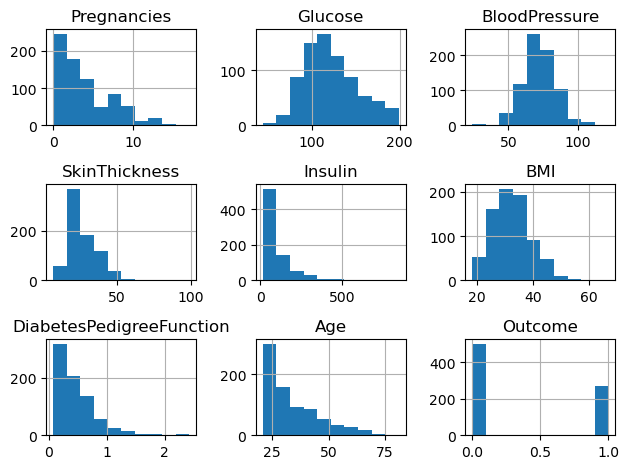

In [38]:
df.hist()
plt.tight_layout()
plt.show()

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual box plots and histplots
def histplot_boxplot(data, feature, figsize=(12, 7), bins=None):
    print('Univariate for ...', feature)
    fig, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True, figsize=figsize)
    
    sns.boxplot(data=data, x=feature, color='violet', ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=feature, ax=ax_hist, bins=bins) if bins else sns.histplot(data=data, x=feature, ax=ax_hist)
    plt.axvline(data[feature].mean(), color='green', linestyle='--')  # Use mean instead of data[feature]
    plt.axvline(data[feature].median(), color='black', linestyle='-')
    plt.show()

Univariate for ... Pregnancies


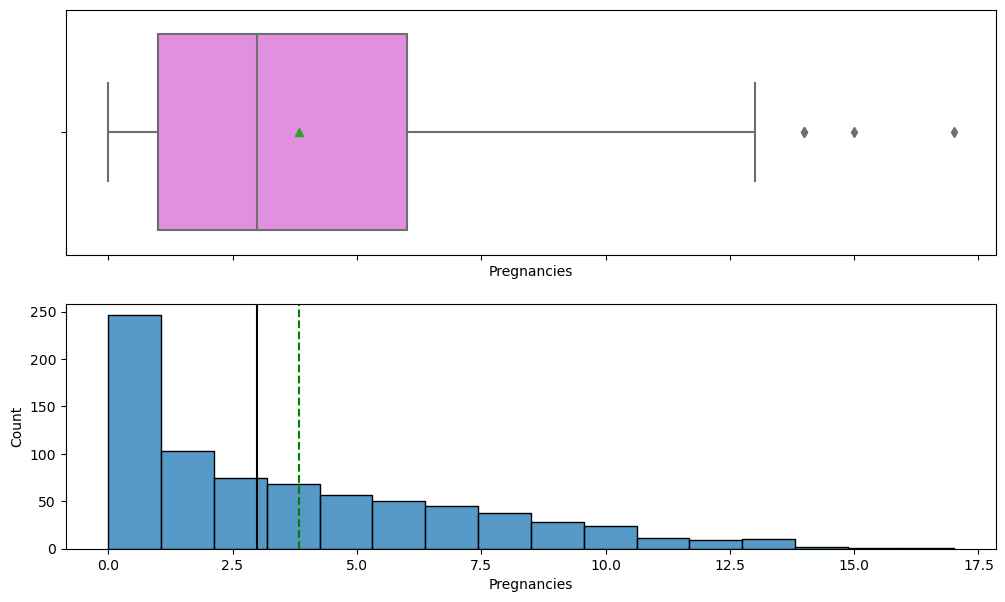

Univariate for ... Glucose


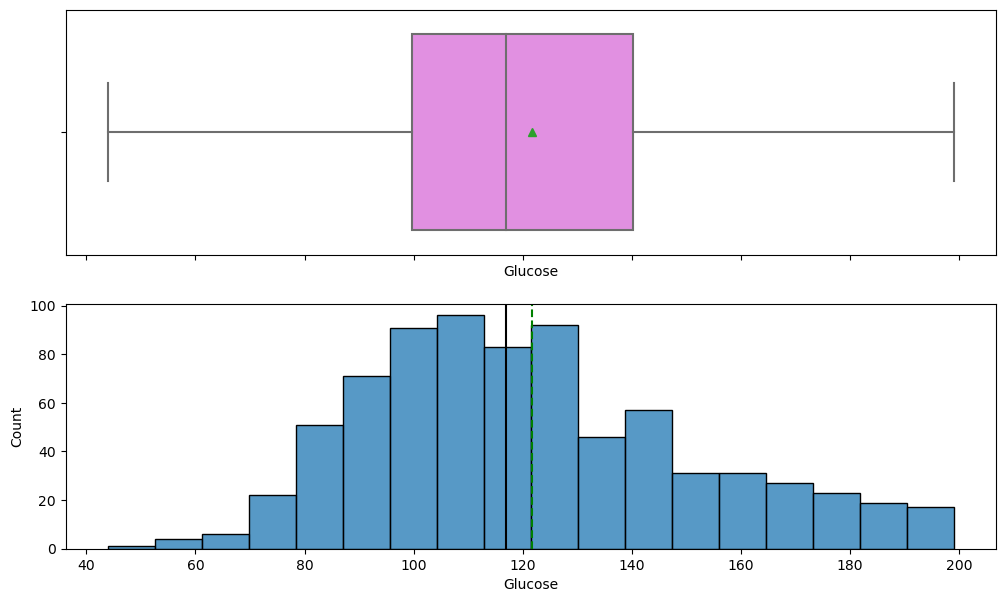

Univariate for ... BloodPressure


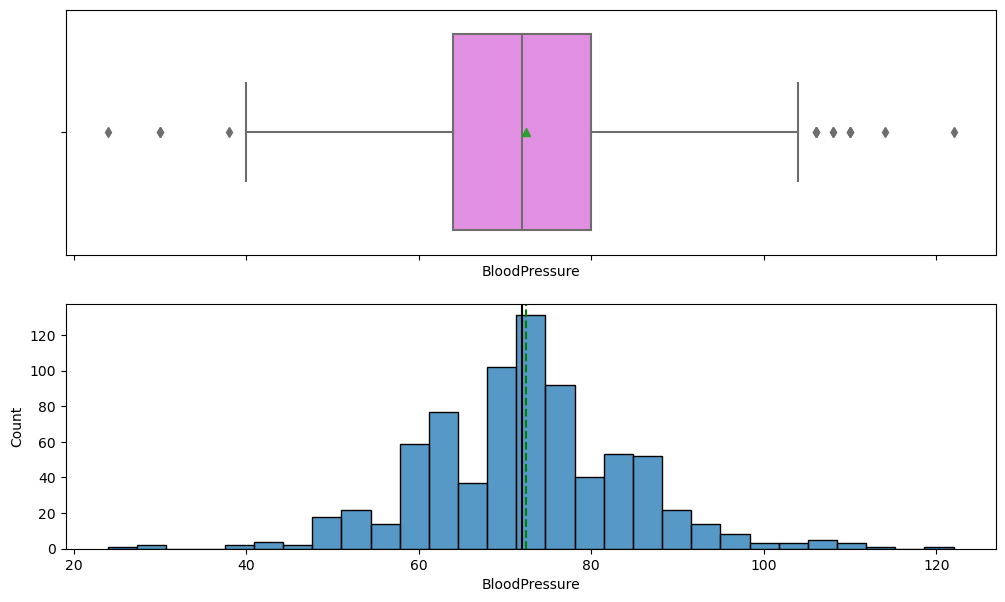

Univariate for ... SkinThickness


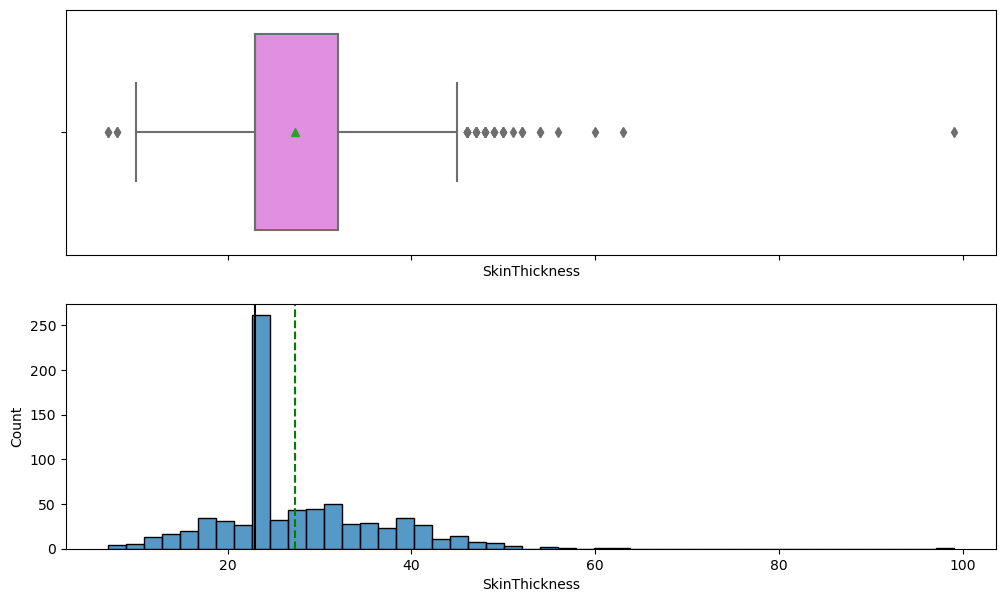

Univariate for ... Insulin


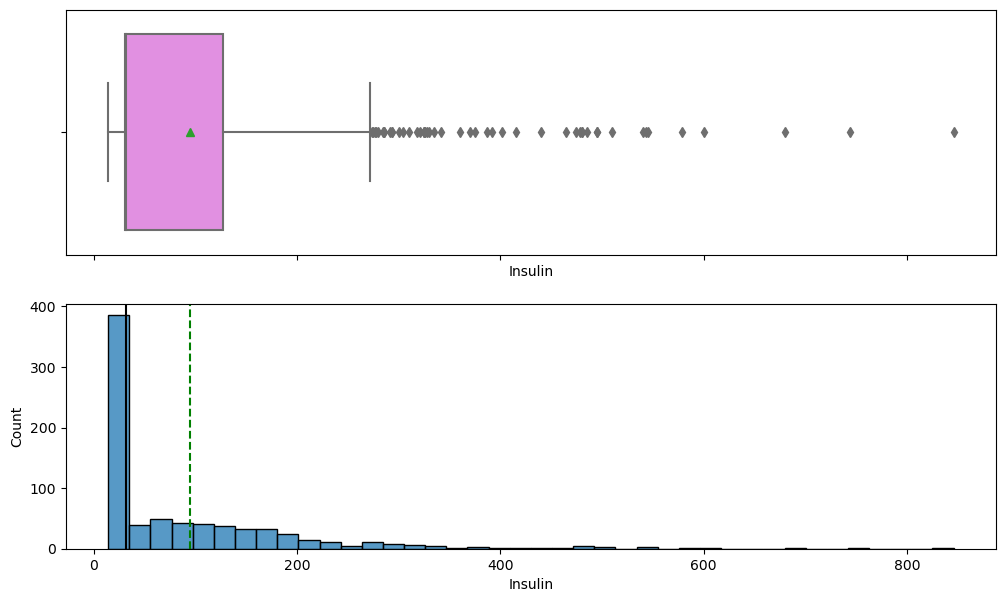

Univariate for ... BMI


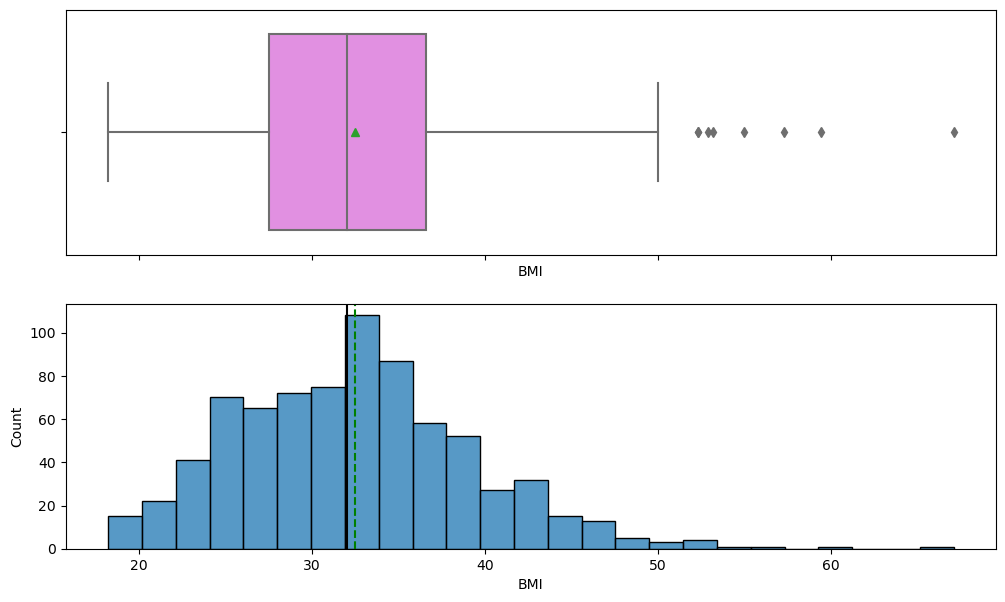

Univariate for ... DiabetesPedigreeFunction


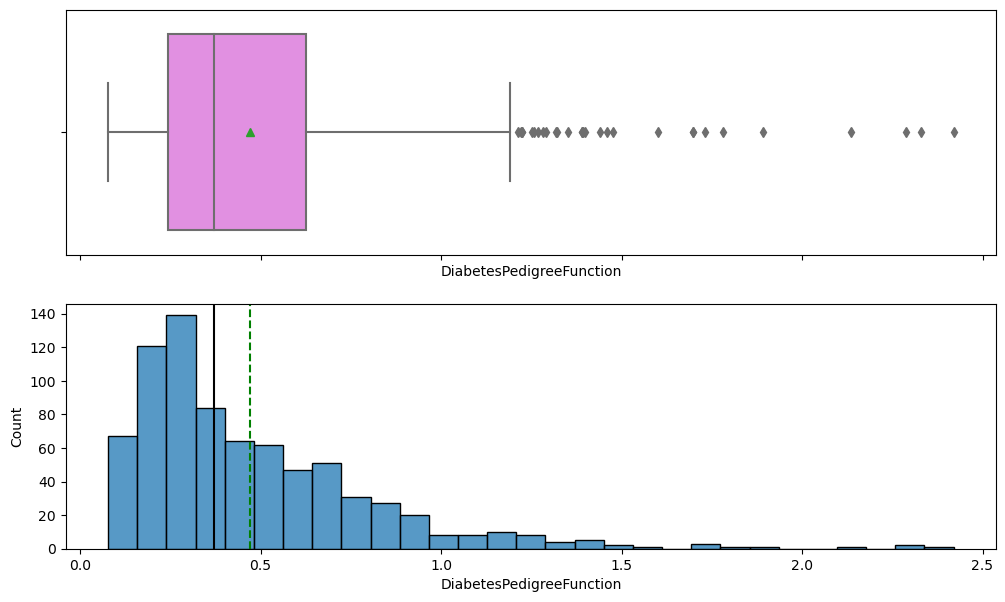

Univariate for ... Age


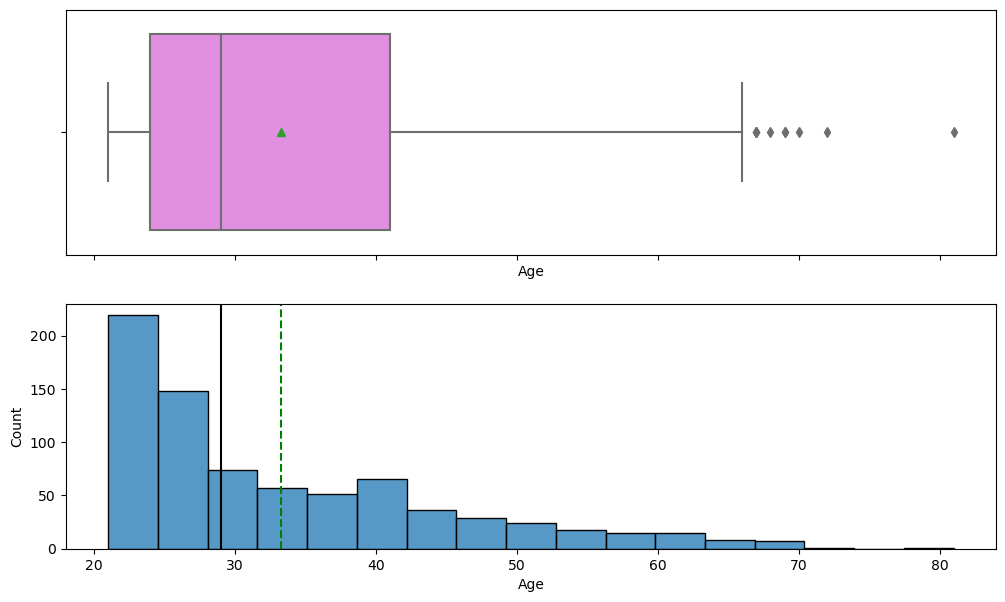

Univariate for ... Outcome


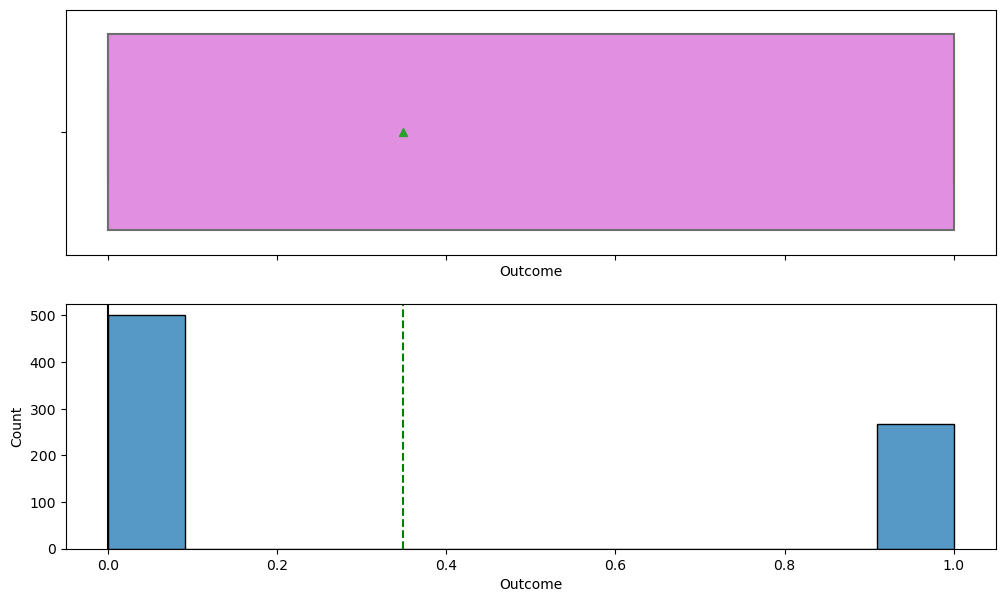

In [45]:
# Assuming df is your DataFrame, iterate through numeric columns
for col in df.select_dtypes(exclude='O').columns:
    histplot_boxplot(data=df, feature=col)

In [46]:
num_outliers={}
for col in df.columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    outliers=((df[col]<(q1-1.5*iqr))|(df[col]>(q3+1.5*iqr)))
    num_outliers[col]=outliers.sum()
num_outliers

{'Pregnancies': 4,
 'Glucose': 0,
 'BloodPressure': 14,
 'SkinThickness': 35,
 'Insulin': 49,
 'BMI': 8,
 'DiabetesPedigreeFunction': 29,
 'Age': 9,
 'Outcome': 0}

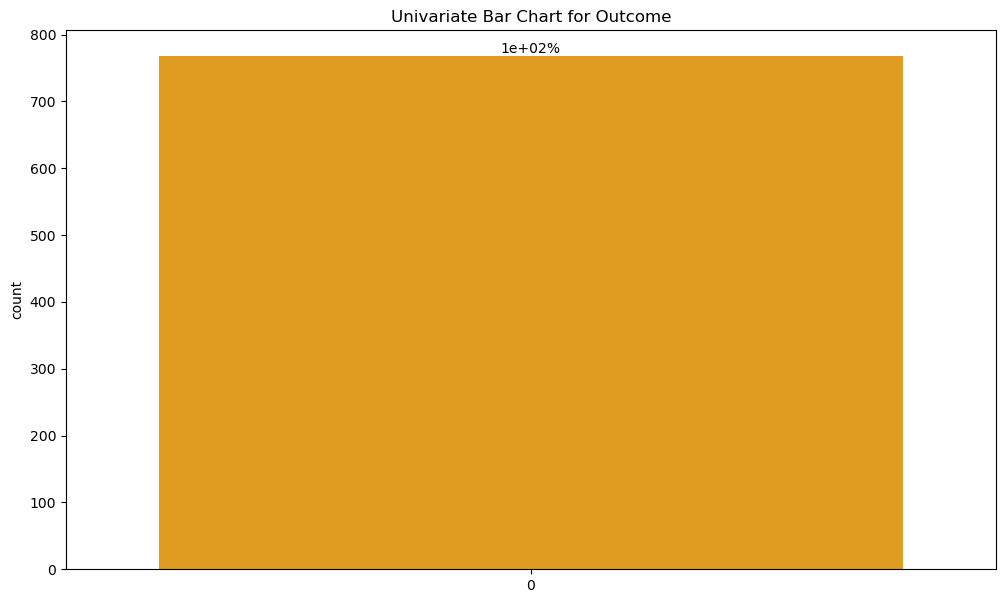

In [48]:
# univariate barchart for categorical outcome
plt.figure(figsize=(12,7))
ax=sns.countplot(df["Outcome"],color="orange")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate("{:.2g}%".format(y*100/len(df)),(x.mean(),y),ha="center",va="bottom")
plt.title("Univariate Bar Chart for Outcome")
plt.show()